In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib
import os


# Load dataset

In [4]:
df = pd.read_csv("../data/synthetic_battery_data.csv")
df.head(10)


,battery_percent,time_since_unplugged_min,cpu_usage,gpu_usage,screen_brightness,num_apps_running,heavy_app_running,wifi_on,bluetooth_on,power_mode,fan_speed_rpm,device_temperature,remaining_minutes
0,40.581311,216.360109,5.396145,61.697521,12.399195,23,0,1,1,balanced,1334.044754,71.145207,9.868750
1,95.317859,206.497618,5.029714,42.081387,10.716451,3,0,1,1,balanced,2391.411807,65.045025,28.197475
2,74.539424,29.630505,47.503711,5.013621,30.193792,5,1,1,0,battery_saver,1371.200114,93.954127,10.020789
3,61.872556,276.849149,7.636433,82.665914,81.938885,15,0,1,0,balanced,1342.896063,63.016180,11.843629
4,19.821771,170.973188,92.707930,88.229622,91.427289,9,1,1,0,battery_saver,2446.194893,48.349148,5.000000
5,19.819479,109.753931,24.985866,38.793907,45.259153,8,0,1,1,performance,1961.728020,88.118300,5.000000
6,10.517943,227.205036,47.539826,55.229473,60.687874,8,0,1,1,battery_saver,2357.760412,55.199961,5.000000
7,87.286734,77.952272,10.502387,40.526876,73.544734,36,0,1,0,balanced,2531.559063,45.931900,20.900653
8,62.105926,208.359441,51.984357,28.969169,95.764303,34,0,1,0,balanced,1482.746992,76.236049,10.136004
9,72.266895,12.873651,39.196051,6.958691,92.163901,18,0,1,1,battery_saver,3199.612242,54.099109,20.638641


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   battery_percent           8000 non-null   float64
 1   time_since_unplugged_min  8000 non-null   float64
 2   cpu_usage                 8000 non-null   float64
 3   gpu_usage                 8000 non-null   float64
 4   screen_brightness         8000 non-null   float64
 5   num_apps_running          8000 non-null   int64  
 6   heavy_app_running         8000 non-null   int64  
 7   wifi_on                   8000 non-null   int64  
 8   bluetooth_on              8000 non-null   int64  
 9   power_mode                8000 non-null   object 
 10  fan_speed_rpm             8000 non-null   float64
 11  device_temperature        8000 non-null   float64
 12  remaining_minutes         8000 non-null   float64
dtypes: float64(8), int64(4), object(1)
memory usage: 812.6+ KB


In [8]:
df.describe()

,battery_percent,time_since_unplugged_min,cpu_usage,gpu_usage,screen_brightness,num_apps_running,heavy_app_running,wifi_on,bluetooth_on,fan_speed_rpm,device_temperature,remaining_minutes
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,52.004859,149.795788,51.056535,44.586655,54.751347,20.823375,0.305625,0.795500,0.399875,2854.426017,67.345632,9.428302
std,27.454329,86.307812,25.913158,25.833945,25.924514,10.678655,0.460700,0.403361,0.489903,945.697607,15.768020,5.131989
min,5.001105,1.015795,5.004331,0.006075,10.000498,3.000000,0.000000,0.000000,0.000000,1200.922731,40.026850,5.000000
25%,28.117538,75.312245,29.209449,22.204446,32.233156,12.000000,0.000000,1.000000,0.000000,2043.620773,53.569267,5.000000
50%,51.835610,148.602558,51.443020,44.610137,54.986887,21.000000,0.000000,1.000000,0.000000,2844.772594,67.380934,7.885882
75%,75.607147,225.905980,73.178594,66.633801,76.947565,30.000000,1.000000,1.000000,1.000000,3662.689573,80.796274,12.051968
max,99.973179,299.977523,94.991088,89.975888,99.981043,39.000000,1.000000,1.000000,1.000000,4499.021416,94.995159,45.723404


# Visualizations 

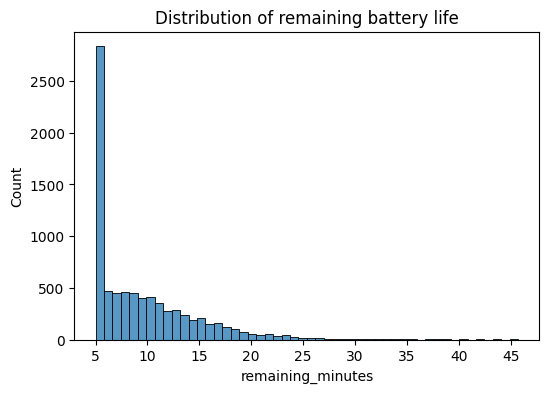

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df["remaining_minutes"], bins=50)
plt.title("Distribution of remaining battery life")
plt.show()


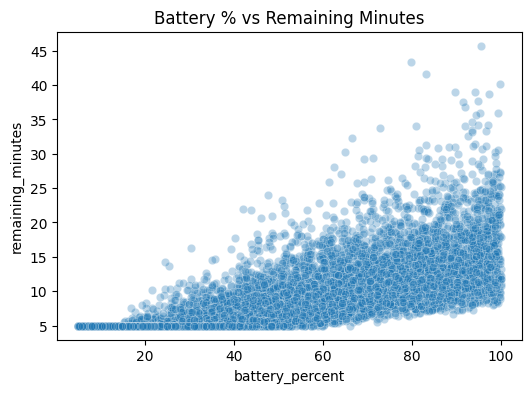

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="battery_percent", y="remaining_minutes", alpha=0.3)
plt.title("Battery % vs Remaining Minutes")
plt.show()


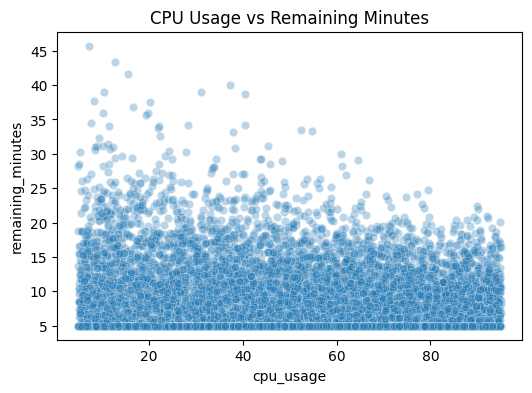

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="cpu_usage", y="remaining_minutes", alpha=0.3)
plt.title("CPU Usage vs Remaining Minutes")
plt.show()


# Train-test split + preprocessing

In [12]:
X = df.drop("remaining_minutes", axis=1)
y = df["remaining_minutes"]

numeric_features = [
    "battery_percent",
    "time_since_unplugged_min",
    "cpu_usage",
    "gpu_usage",
    "screen_brightness",
    "num_apps_running",
    "heavy_app_running",
    "wifi_on",
    "bluetooth_on",
    "fan_speed_rpm",
    "device_temperature",
]

categorical_features = ["power_mode"]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


# Model setup and training

In [13]:
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(0.5512258317491313, 0.9651733310689344)

# Save trained model

In [14]:
os.makedirs("../models", exist_ok=True)
joblib.dump(pipeline, "../models/battery_model.pkl")
print("Model saved to ../models/battery_model.pkl")


Model saved to ../models/battery_model.pkl
